<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 1</center></h2>

#### Brief
Please refer to the document attached with this assignment for submission instructions and other requirements. Please do not change the order of the notebook. Implement your solutions in the spaces provided.

#### Overview
In the first part of this assignment, you will pre-process the given data.<br>
In the second part, you will implement Linear Regression as discussed in class.<br>
For Part 1, we will use 'googleplaystore.csv' dataset which contain information of application on the Google Play Store.<br>
For Part 2, we will use scaled down version of Boston house price dataset.
All datasets have been provided along with this .ipynb file on the classroom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

## Part 1
### Data Pre-Processing and Visualization

In [2]:
# There is a series of tutorials on pandas library https://www.tutorialspoint.com/python_pandas/python_pandas_introduction.htm

# Load Dataset
data = pd.read_csv('googleplaystore.csv')
df = data.copy()

In [3]:
'''
Print the names of all columns in the dataset.
'''
# YOUR CODE HERE
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
'''
Some "Rating" values are missing (NaN), fill them by taking the average of the "Rating" values in the rows above and below.
Incase the "Rating" value in the row below is also missing, use only the row above.
'''
# YOUR CODE HERE
df.loc[df['Rating'].isnull(), 'Rating'] = 0
for val in df.loc[df['Rating'].isnull()].index:
    df.iloc[val,2] = (df.iloc[val-1, 2] + df.iloc[val+1, 2])/2

In [5]:
'''
Write a method to calculate the total profit (i.e. No. of installations x price) of all apps which have a
Rating of 4.3 or below.
You need to process the strings in the "Installs" and "Price" columns to retrieve their values as integers.
You need to sum up the individual profits for all apps that meet the above condition.
'''
# YOUR CODE HERE
df.loc[df['Price'] == 'Everyone', 'Price'] = '0'
df['Price'] = df['Price'].str.replace("$", '').str.replace('nan','0')
df['Price'] = df['Price'].astype(float)

df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').str.replace('Free', '0')
df['Installs'] = df['Installs'].astype(float)

profit = []
for val in df.loc[df['Rating'] <= 4.3].index:
    profit.append(df.iloc[val, 2] * df.iloc[val, 5])
df['prof'] = pd.Series(profit)
df.loc[df['prof'].isnull(), 'prof'] = df['prof'].mean()
df['prof'] = df['prof'].astype(float)

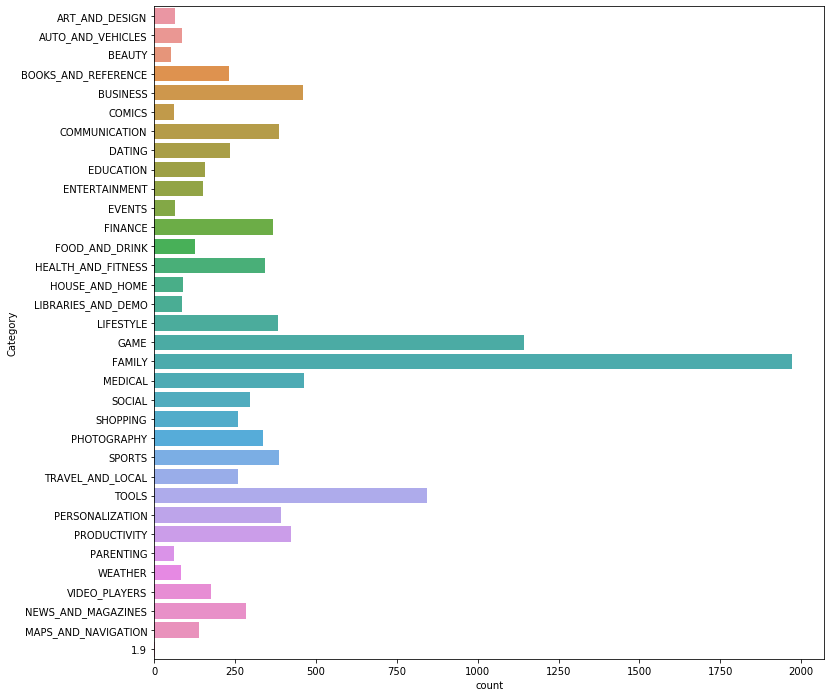

In [6]:
'''
Create a histogram of the total counts of each Category in the dataset.
'''
# YOUR CODE HERE
plt.figure(figsize=(12,12))
sns.countplot(y = 'Category', data = df)

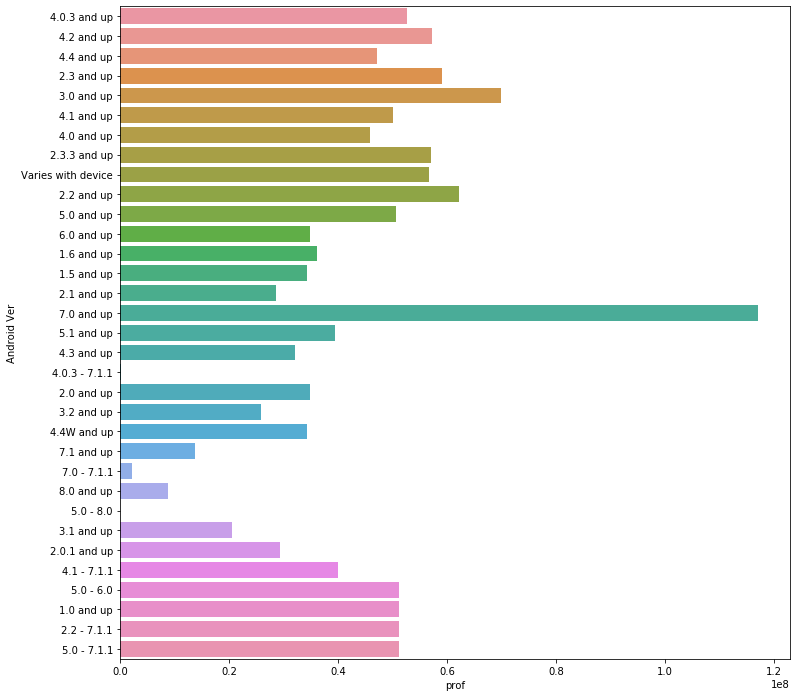

In [7]:
'''
Create a bar graph of profit generated by each android version.
'''
# YOUR CODE HERE
plt.figure(figsize=(12,12))
sns.barplot(x = df['prof'], y = df['Android Ver'],ci=None)

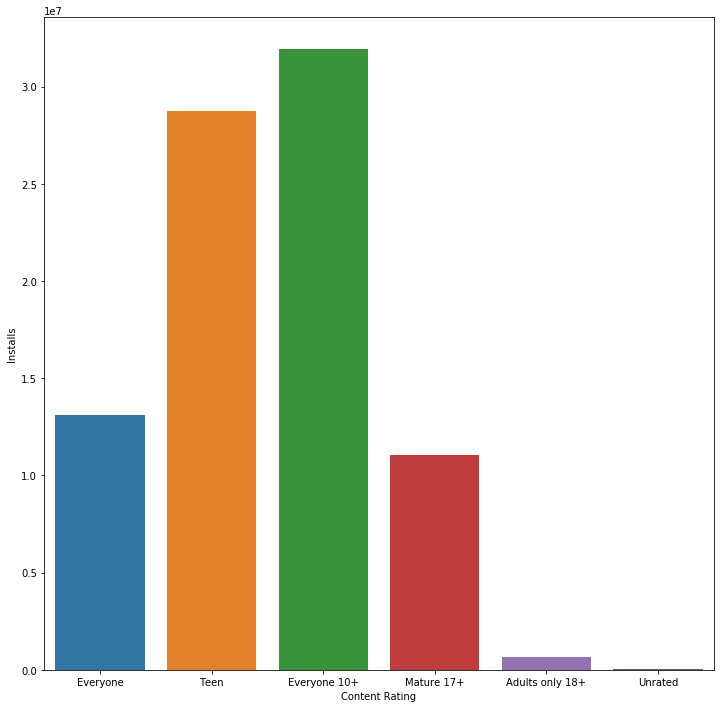

In [8]:
'''
For family category, plot number of installations against each content rating.
'''
# YOUR CODE HERE


plt.figure(figsize=(12,12))
sns.barplot(x = df['Content Rating'], y = df['Installs'].astype(int),ci=None)

# Part 2
## Linear Regression

The goal of this assignment is to develop your understanding of a basic Machine Learning model and learn some basic concepts such as how datasets are visualised and misc. We think that it is necessary to not only understand the mathematics behind the models but also to know how to convert that knowledge into code that can work.



Implementation detail of each step is given below.

## For Dataset 1

In [9]:
# Load Dataset
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )

x_train.resize(len(x_train))
x_test.resize(len(x_test))


#### Part 2.a Linear Regression(without gradient descent) 

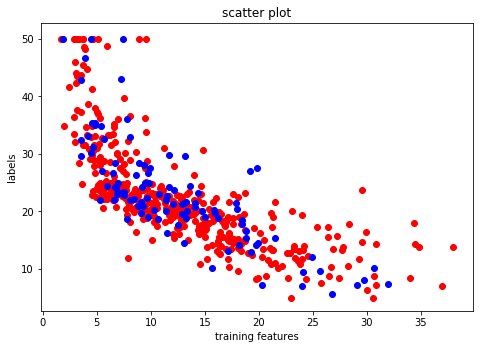

In [10]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''
# YOUR CODE HERE
def plot_data(x_train, y_train):
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(x_train, y_train, color='r')
    ax.scatter(x_test, y_test, color='b')
    ax.set_xlabel('training features')
    ax.set_ylabel('labels')
    ax.set_title('scatter plot')
    plt.show()
    
plot_data(x_train, y_train)

In [11]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE

x_train_mean = np.mean(x_train)
y_train_mean = np.mean(y_train)

t = np.sum((x_train-x_train_mean)*(y_train-y_train_mean))
d = np.sum((x_train-x_train_mean)*(x_train-x_train_mean))

slope = t/d
intercept = y_train_mean - slope*x_train_mean

y_pred_train = (slope * x_train) + intercept
y_pred_train

y_pred_test = (slope * x_test) + intercept

In [12]:
'''
Implement mean square error function. i.e err = mean_square_error(Y_actual, Y_predicted) 
where err is the mean square error of actual label (i.e. Y_actual) and predicted lable ( i.e. Y_predicted)
'''
def mean_square_error(y_train, y_pred):
    return sum(((y_train - y_pred)**2)/len(y_train))

In [13]:
'''
Compute mean square error from line using training data i.e. training error.
'''
mean_square_error(y_train, y_pred_train)

39.429056363858884

In [14]:
'''
Compute mean square error from line using test data i.e. test error.
''' 
mean_square_error(y_test, y_pred_test)

34.8761967368312

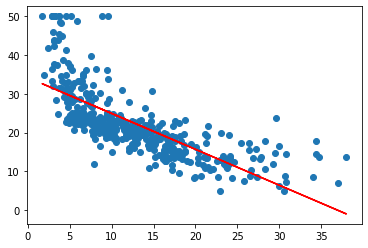

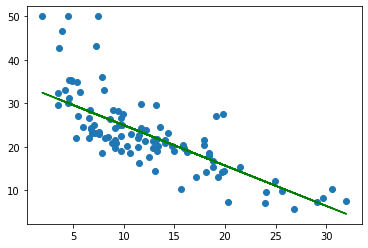

In [15]:
'''
Plot regression line on training and testing data separately.
'''
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'r')
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'g')

## For Dataset 2

In [16]:
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )

x_train.resize(len(x_train))
x_test.resize(len(x_test))

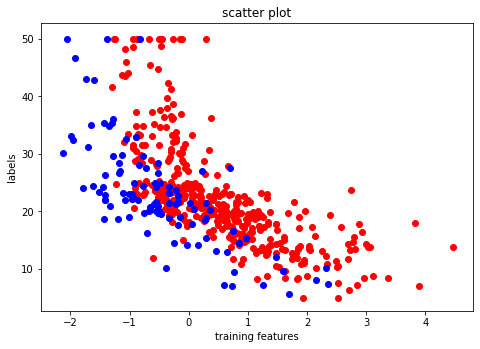

In [17]:
'''
Display training and testing dataset with different colors using matplotlib library.
'''

plot_data(x_train, y_train)

In [18]:
'''
Compute line parameters from training data. 
Compute 'm' and 'c' of line by formula given in the above equations.
a-hat is c and b-hat is m in equation y = mx + c
'''
# YOUR CODE HERE

x_train_mean = np.mean(x_train)
y_train_mean = np.mean(y_train)

t = np.sum((x_train-x_train_mean)*(y_train-y_train_mean))
d = np.sum((x_train-x_train_mean)*(x_train-x_train_mean))

slope = t/d
intercept = y_train_mean - slope*x_train_mean

y_pred_train = (slope * x_train) + intercept
y_pred_train

y_pred_test = (slope * x_test) + intercept

In [19]:
'''
Compute mean square error from line using training data i.e. training error.
'''
# YOUR CODE HERE
mean_square_error(y_train, y_pred_train)

42.8401980796988

In [20]:
'''
Compute mean square error from line using test data i.e. test error.
'''
# YOUR CODE HERE   
mean_square_error(y_test, y_pred_test)

70.80834523792942

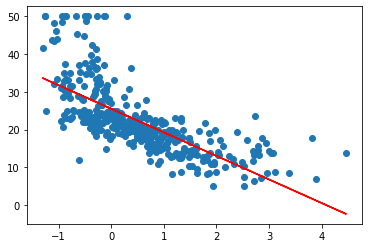

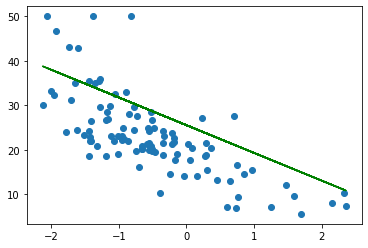

In [21]:
'''
Plot regression line on training and testing data separately.
'''
# YOUR CODE HERE
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'r')
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'g')

# Part 2.b Linear Regression (with gradient descent)

# Dataset 1

In [22]:
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset.pkl", "rb" ) )
x_train.resize(len(x_train))
x_test.resize(len(x_test))

In [23]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''

alpha = 0.001
c = 2
m = 2
epochs = 5000
m_derivative = 0
c_derivative = 0

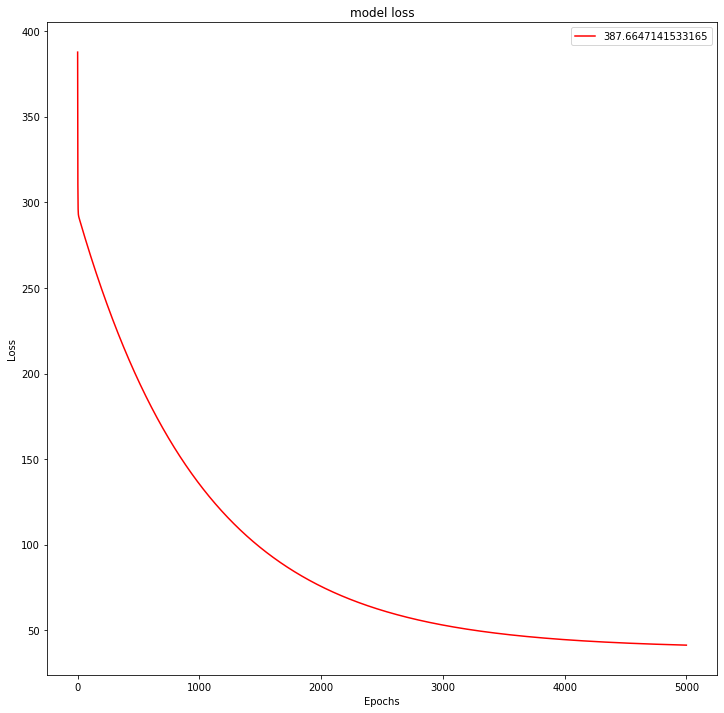

In [24]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''

loss = []
N = len(x_train)
for e in range(epochs):
    
    for t in range(0, N):
        m_derivative = -(2/N) * x_train[t] * (y_train[t] - (m *x_train[t] + c)) 
        c_derivative = -(2/N)*(y_train[t] - (m *x_train[t] + c))
        m = m - (alpha * m_derivative)
        c = c - (alpha * c_derivative)
#         print( m , c )
    
    y_pred_train = (m *x_train) + c
    error = mean_square_error(y_train, y_pred_train)
    loss.append(error)

plt.figure(figsize=(12,12))
plt.plot(range(epochs), loss, color='red')
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel(r'Loss')
plt.legend(loss)
plt.show()


In [25]:
loss[-1]

41.38374564457993

In [26]:
'''
Compute mean square error of final trained parameters on testing data
'''
M = len(x_test)
y_pred_test = (m * x_test) + c
error = mean_square_error(y_test, y_pred_test)
error

38.985121688825544

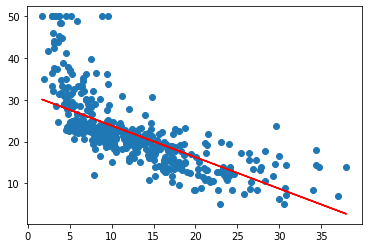

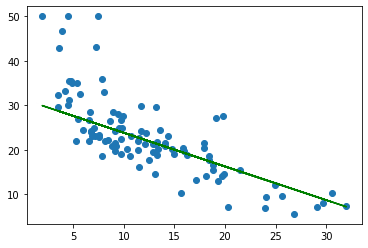

In [27]:
'''
Plot a regression line on the training and the testing data separately.
'''
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'r')
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'g')

# Dataset 2

In [28]:
(x_train, y_train), (x_test, y_test)= pickle.load( open( "dataset2.pkl", "rb" ) )
x_train.resize(len(x_train))
x_test.resize(len(x_test))

In [29]:
'''
Initialize parameters i.e. learning rates, initial values of line parameters and number of epochs.
'''
alpha = 0.001
c = 2
m = 2
epochs = 5000
m_derivative = 0
c_derivative = 0

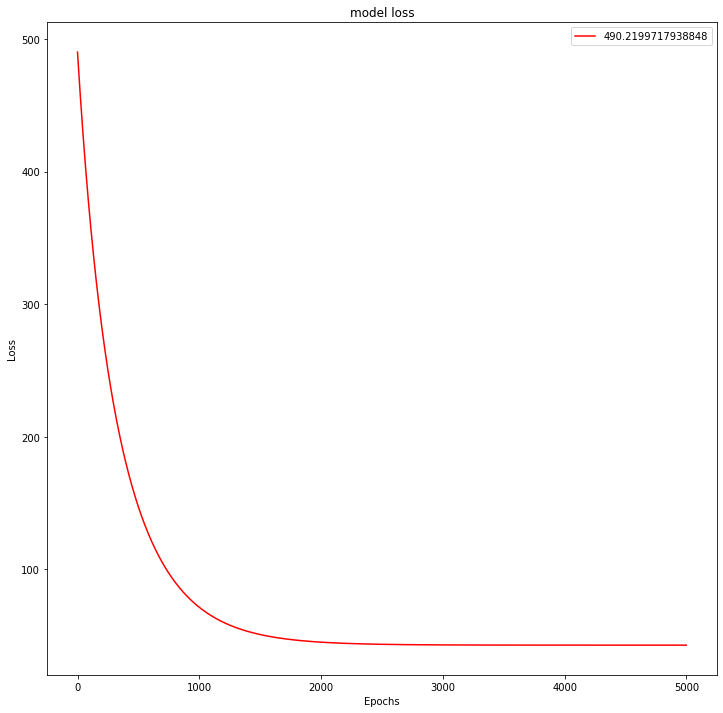

In [30]:
'''
Predict output and update parameters using stochastic gradient descent.
Compute mean square error in each iteration using mean_square_error function and plot on the graph using matplotlib library
'''

loss = []
N = len(x_train)
for e in range(epochs):
    
    for t in range(0, N):
        m_derivative = -(2/N) * x_train[t] * (y_train[t] - (m *x_train[t] + c)) 
        c_derivative = -(2/N)*(y_train[t] - (m *x_train[t] + c))
        m = m - (alpha * m_derivative)
        c = c - (alpha * c_derivative)
#         print( m , c )
    
    
    y_pred_train = (m *x_train) + c
    error = mean_square_error(y_train, y_pred_train)
    loss.append(error)

plt.figure(figsize=(12,12))
plt.plot(range(epochs), loss, color='red')
plt.title('model loss')
plt.xlabel('Epochs')
plt.ylabel(r'Loss')
plt.legend(loss, loc='best')
plt.show()


In [31]:
loss[-1]

42.84130045407828

In [32]:
'''
Compute mean square error of final trained parameters on testing data
'''
M = len(x_test)
y_pred_test = (m * x_test) + c
error = mean_square_error(y_test, y_pred_test)
error

70.32448730420947

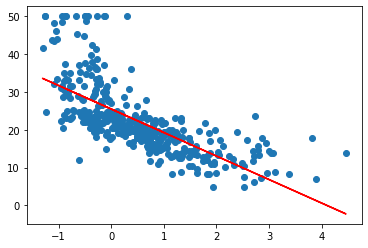

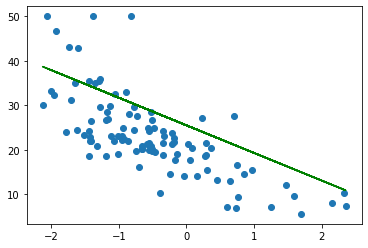

In [33]:
'''
Plot a regression line on the training and the testing data separately.
'''
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color = 'r')
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'g')

**End of Notebook**